In [1]:
import pandas as pd
import numpy as np
import random
import csv
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix  
import matplotlib.pyplot as plt

In [12]:
url = "D:\\TUGAS AKHIR\\Data TA\\Australian fraud dataset\\australian.csv"
colnames = ['x1', 'x2', 'x3','x4','x5','x6','x7','x8','x9','x10','x11','x12','x13','x14', 'y']
data = pd.read_csv(url, header = None, names = colnames)
X = data.drop('y', axis = 1)
X = (X-X.mean())/X.std()
y = data['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)  

In [7]:
#################### I N P U T ####################
W = 0.5
c1 = 0.5
c2 = 0.5

n_iterations = int(input("Inform the number of iterations: "))
n_particles = int(input("Inform the number of particles: "))

Inform the number of iterations: 10
Inform the number of particles: 100


In [8]:
#mencari nilai 0-1 loss dari tiap partikel
#partikle = (gamma,C) untuk rbf
def fitness_function(position):
    svclassifier = SVC(kernel='poly', gamma = position[0], C = position[1] )  
    svclassifier.fit(X_train, y_train)
    y_train_pred = svclassifier.predict(X_train)
    y_test_pred = svclassifier.predict(X_test)   
    return (confusion_matrix(y_train,y_train_pred)[0][1] + confusion_matrix(y_train,y_train_pred)[1][0])/np.sum(confusion_matrix(y_train,y_train_pred)), (confusion_matrix(y_test,y_test_pred)[0][1] + confusion_matrix(y_test,y_test_pred)[1][0])/np.sum(confusion_matrix(y_test,y_test_pred))

#plotting (x axis = gamma, y axis = C)
def plot(position):
    x = []
    y = []
    for i in range(0,len(particle_position_vector)):
        x.append(particle_position_vector[i][0])
        y.append(particle_position_vector[i][1])
    colors = (0,0,0)
    plt.scatter(x, y, c = colors, alpha = 0.1)
    plt.xlabel('C')
    plt.ylabel('gamma')
    plt.axis([0,10,0,10])
    plt.gca().set_aspect('equal', adjustable='box')
    return plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


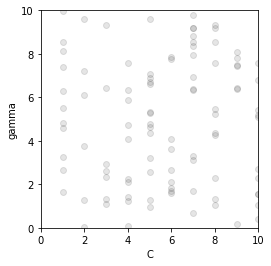

error of particle- 1 is (training, test) (0.0, 0.21739130434782608)  At (gamma, c):  [7.         9.18881738]
error of particle- 2 is (training, test) (0.0018115942028985507, 0.2246376811594203)  At (gamma, c):  [2.         0.05467787]
error of particle- 3 is (training, test) (0.0, 0.21739130434782608)  At (gamma, c):  [5.         9.59641723]
error of particle- 4 is (training, test) (0.0, 0.21739130434782608)  At (gamma, c):  [4.         1.23179075]
error of particle- 5 is (training, test) (0.0, 0.21739130434782608)  At (gamma, c):  [9.         7.42137606]
error of particle- 6 is (training, test) (0.0, 0.21739130434782608)  At (gamma, c):  [8.         9.18287016]
error of particle- 7 is (training, test) (0.0, 0.21739130434782608)  At (gamma, c):  [10.          1.57456366]
error of particle- 8 is (training, test) (0.0, 0.21739130434782608)  At (gamma, c):  [5.         4.33781737]
error of particle- 9 is (training, test) (0.0, 0.21739130434782608)  At (gamma, c):  [3.        2.9474705]
er

error of particle- 77 is (training, test) (0.0018115942028985507, 0.18840579710144928)  At (gamma, c):  [1.         4.60010273]
error of particle- 78 is (training, test) (0.0, 0.21739130434782608)  At (gamma, c):  [4.         4.72015078]
error of particle- 79 is (training, test) (0.0, 0.21739130434782608)  At (gamma, c):  [7.         3.10117059]
error of particle- 80 is (training, test) (0.0, 0.21739130434782608)  At (gamma, c):  [8.         8.53864313]
error of particle- 81 is (training, test) (0.0, 0.21739130434782608)  At (gamma, c):  [6.         2.64855753]
error of particle- 82 is (training, test) (0.0, 0.21739130434782608)  At (gamma, c):  [7.         6.39959624]
error of particle- 83 is (training, test) (0.0, 0.21739130434782608)  At (gamma, c):  [7.         6.94928639]
error of particle- 84 is (training, test) (0.0, 0.21739130434782608)  At (gamma, c):  [6.         7.85357194]
error of particle- 85 is (training, test) (0.0, 0.21739130434782608)  At (gamma, c):  [1.         7.39

TypeError: type numpy.ndarray doesn't define __round__ method

In [15]:
particle_position_vector = np.array([np.array([random.randint(1,10), random.random()*10]) for _ in range(n_particles)])
pbest_position = particle_position_vector
pbest_fitness_value = np.array([float('inf') for _ in range(n_particles)])
gbest_fitness_value = np.array([float('inf'), float('inf')])
gbest_position = np.array([float('inf'), float('inf')])

velocity_vector = ([np.array([0, 0]) for _ in range(n_particles)])
iteration = 0
while iteration < n_iterations:
    plot(particle_position_vector)
    for i in range(n_particles):
        fitness_cadidate = fitness_function(particle_position_vector[i])
        print("error of particle-",i+1,"is (training, test)", fitness_cadidate, " At (gamma, c): ", particle_position_vector[i])
        
        if(pbest_fitness_value[i] > fitness_cadidate[1]):
            pbest_fitness_value[i] = fitness_cadidate[1]
            pbest_position[i] = particle_position_vector[i]

        if(gbest_fitness_value[1] > fitness_cadidate[1]):
            gbest_fitness_value = fitness_cadidate
            gbest_position = particle_position_vector[i]
        elif(gbest_fitness_value[1] == fitness_cadidate[1] and gbest_fitness_value[0] > fitness_cadidate[0]):
            gbest_fitness_value = fitness_cadidate
            gbest_position = particle_position_vector[i]
            
    for i in range(n_particles):
        new_velocity = (W*velocity_vector[i]) + int(round((c1*random.randint(0,3)))) * (pbest_position[i] - particle_position_vector[i]) + (c2*random.random()) * (gbest_position-particle_position_vector[i])
        new_position = new_velocity + particle_position_vector[i]
        particle_position_vector[i] = new_position
        
    iteration = iteration + 1
    
print("The best position is ", gbest_position, "in iteration number", iteration, "with error rate (train, test):", fitness_function(gbest_position))